![aula22capa.png](./figuras/aula22capa.png)


### Objetivo: Explorar questões de viés e discriminação em modelos de IA e como mitigar problemas éticos.

## 1. Introdução

Ética e Impacto Social da IA
A Inteligência Artificial (IA) tem se tornado uma ferramenta essencial em diversas áreas, desde a saúde até o setor financeiro. No entanto, sua implementação nem sempre é justa. Modelos de IA podem perpetuar preconceitos existentes nos dados, influenciando decisões de forma discriminatória.

Nesta aula, vamos explorar:

- Introdução à Ética e IA
- Como o viés pode surgir nos dados e como isso afeta os resultados de um modelo de IA.
- Também discutiremos abordagens para mitigar esses impactos

---

## 2. Introdução à Ética e IA

A Inteligência Artificial tem se tornado uma ferramenta poderosa, impactando diversos setores. No entanto,
à medida que a IA avança, surgem desafios éticos fundamentais:

1. Transparência e Explicabilidade: Modelos de IA frequentemente funcionam como caixas-pretas,
   dificultando o entendimento das decisões tomadas. (Transparência: Decisões da IA devem ser compreensíveis).
   
2. Viés e Discriminação: Sistemas podem herdar e amplificar preconceitos presentes nos dados utilizados
   no treinamento. (Justiça: Tratar todos de maneira equitativa).
   
3. Responsabilidade: Quem deve ser responsabilizado por erros cometidos pela IA? Desenvolvedores,
   empresas ou usuários? (Desenvolvedores e usuários devem ser responsáveis).
   
4. Privacidade: Como os dados coletados são utilizados e protegidos? (Lei Geral de Proteção de Dados Pessoais - LGPD)

---

## 3. Viés e Discriminação em IA

### O que é Viés Algorítmico?

Viés em IA ocorre quando um modelo de aprendizado de máquina produz resultados sistematicamente tendenciosos, favorecendo ou prejudicando determinados grupos.

Fatores que contribuem para o viés:

    - Dados de treinamento enviesados
    - Decisões de design do modelo
    - Falta de representatividade nos dados

### Exemplo Prático: Viés nos Dados

Vamos simular um conjunto de dados que representa a aprovação de crédito baseado em idade, renda e gênero.

In [1]:
# Importação das Bibliotecas

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

2025-02-20 14:13:47.112287: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-20 14:13:47.305760: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1740071627.422086   29886 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1740071627.443055   29886 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-20 14:13:47.650456: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# Definição de semente aleatória para reprodutibilidade

np.random.seed(42)
tf.random.set_seed(42)

### Simulação de um conjunto de dados com viés

In [63]:
np.random.seed(42)
# Criando um conjunto de dados altamente enviesado
n_samples = 10000
data = pd.DataFrame({
    'idade': np.random.randint(18, 60, n_samples),
    'renda': np.random.randint(2000, 10000, n_samples),
    'genero': np.random.choice(["masculino", "feminino"], n_samples, p=[0.95, 0.05]),
    'aprovado': np.random.choice([0, 1], n_samples, p=[0.2, 0.8])  # Viés: Homens têm alta taxa de aprovação
})
data

,idade,renda,genero,aprovado
0,56,7731,masculino,1
1,46,5244,masculino,0
2,32,3040,masculino,1
3,25,5127,masculino,1
4,38,4273,masculino,1
...,...,...,...,...
9995,26,5678,masculino,1
9996,58,6312,masculino,1
9997,35,2622,feminino,1
9998,46,6448,masculino,1


In [64]:
# Ajustando manualmente a taxa de aprovação para mulheres
mask_feminino = data['genero'] == "feminino"
data.loc[mask_feminino, 'aprovado'] = np.random.choice([0, 1], mask_feminino.sum(), p=[0.5, 0.5])

In [65]:
# Codificando a variável categórica de gênero
data['genero'] = data['genero'].map({'masculino': 0, 'feminino': 1})

In [66]:
# Garantindo que todos os dados são numéricos
data = data.astype({'idade': 'int8', 'renda': 'float16', 'genero': 'int8', 'aprovado': 'int8'})

In [67]:
data

,idade,renda,genero,aprovado
0,56,7732.0,0,1
1,46,5244.0,0,0
2,32,3040.0,0,1
3,25,5128.0,0,1
4,38,4272.0,0,1
...,...,...,...,...
9995,26,5680.0,0,1
9996,58,6312.0,0,1
9997,35,2622.0,1,1
9998,46,6448.0,0,1


In [ ]:
# Normalizando as variáveis numéricas
scaler = StandardScaler()
data[['idade', 'renda']] = scaler.fit_transform(data[['idade', 'renda']])

In [69]:
data

,idade,renda,genero,aprovado
0,1.453125,0.743164,0,1
1,0.620605,-0.326172,0,0
2,-0.544922,-1.273438,0,1
3,-1.127930,-0.375977,0,1
4,-0.045471,-0.744141,0,1
...,...,...,...,...
9995,-1.043945,-0.138672,0,1
9996,1.619141,0.133057,0,1
9997,-0.295166,-1.453125,1,1
9998,0.620605,0.191528,0,1


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


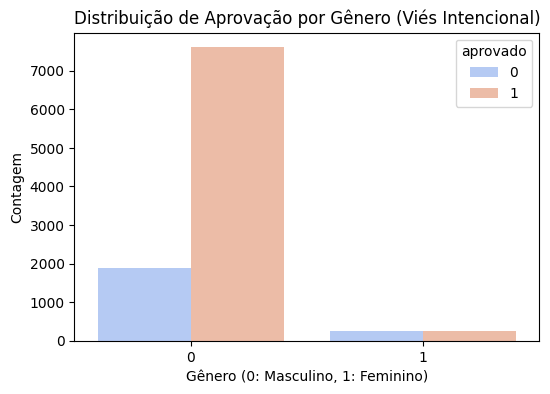

In [72]:
# Visualizando a distribuição de aprovação por gênero
plt.figure(figsize=(6, 4))
sns.countplot(x='genero', hue='aprovado', data=data, palette='coolwarm')
plt.title("Distribuição de Aprovação por Gênero (Viés Intencional)")
plt.xlabel("Gênero (0: Masculino, 1: Feminino)")
plt.ylabel("Contagem")
plt.show()

O gráfico apresenta a distribuição da aprovação com base no gênero, codificado como:

- 0 = Masculino
- 1 = Feminino

A cor azul representa indivíduos não aprovados (0), enquanto a cor salmão representa indivíduos aprovados (1).

**Principais Observações**

- Desproporção na representação dos gêneros

Há muito mais indivíduos do gênero masculino (0) do que do gênero feminino (1) no conjunto de dados.
Isso indica um possível desequilíbrio na amostra, onde os dados contêm 85% de homens e apenas 15% de mulheres.

- Diferença na taxa de aprovação entre os gêneros

Para homens (0): O número de aprovados é significativamente maior do que o número de não aprovados.

Para mulheres (1): A taxa de aprovação parece ser menor, o que pode indicar um possível viés na decisão de aprovação.

- Possível viés do modelo ou na coleta dos dados

Se a IA aprende padrões a partir desses dados, pode haver um viés contra mulheres, pois a representação menor desse grupo pode levar a um modelo menos preciso para elas. O coeficiente do modelo para o gênero pode confirmar esse viés.

**Conclusões**

- Desequilíbrio nos dados: Como há mais homens do que mulheres, a IA pode aprender um viés implícito favorecendo a maior classe.

- Taxa de aprovação diferente: Se os homens estão sendo aprovados mais frequentemente do que as mulheres, é necessário investigar as razões e ajustar o modelo ou a coleta, se necessário.

**Próximos passos recomendados**

- Aplicar balanceamento de dados (ex: oversampling para aumentar a presença feminina nos dados).

- Avaliar os coeficientes do modelo para entender o impacto real do gênero nas previsões.

- Rodar testes adicionais para verificar se a IA está tomando decisões justas.

### Treinamento de um Modelo de Machine Learning


Agora, vamos treinar um modelo de regressão logística para prever se um candidato será aprovado com base em idade e renda


In [73]:
# Separando variáveis
X = data[['idade', 'renda', 'genero']]
y = data['aprovado']

In [74]:
# Dividindo os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
# Remodelando os dados para a rede neural recorrente
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1])).astype('float32')
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1])).astype('float32')

In [76]:
# Criando uma rede neural recorrente
model_rnn = keras.Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    SimpleRNN(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
'''
Uso da função de ativação ReLU e saída sigmoid para previsão binária.
'''

2025-02-20 14:37:16.625119: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


'\nUso da função de ativação ReLU e saída sigmoid para previsão binária.\n'

In [77]:
# Compilando o modelo
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [78]:
# Treinando a rede neural
history = model_rnn.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7251 - loss: 0.5978 - val_accuracy: 0.7645 - val_loss: 0.5487
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7999 - loss: 0.5020 - val_accuracy: 0.7645 - val_loss: 0.5412
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8002 - loss: 0.4966 - val_accuracy: 0.7655 - val_loss: 0.5382
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8006 - loss: 0.4940 - val_accuracy: 0.7645 - val_loss: 0.5370
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8033 - loss: 0.4912 - val_accuracy: 0.7655 - val_loss: 0.5363
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8029 - loss: 0.4931 - val_accuracy: 0.7650 - val_loss: 0.5360
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8022 - loss: 0.4908 - val_accuracy: 0.7645 - val_loss: 0.5354
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8040 - loss: 0.4897 - val_accuracy: 0.

In [80]:
# Avaliando o modelo
loss, accuracy = model_rnn.evaluate(X_test_rnn, y_test)
print(f'Acurácia do modelo RNN: {accuracy:.2f}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7525 - loss: 0.5465
Acurácia do modelo RNN: 0.76


In [81]:
# Gerando inferências para análise de viés
predictions = model_rnn.predict(X_test_rnn)
predictions = (predictions > 0.5).astype(int)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


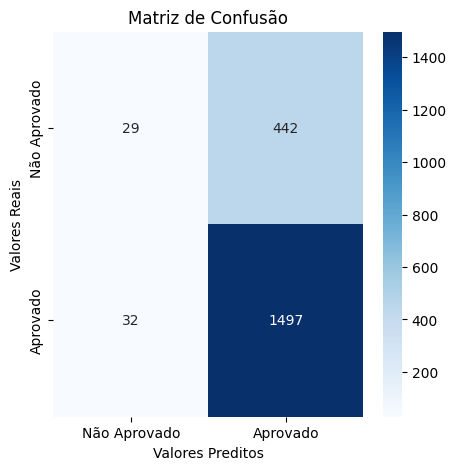

In [82]:
# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Aprovado', 'Aprovado'], yticklabels=['Não Aprovado', 'Aprovado'])
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [83]:
# Relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, predictions))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.48      0.06      0.11       471
           1       0.77      0.98      0.86      1529

    accuracy                           0.76      2000
   macro avg       0.62      0.52      0.49      2000
weighted avg       0.70      0.76      0.69      2000



**Análise do Relatório de Classificação**

O relatório de classificação contém métricas que avaliam o desempenho do modelo na predição das classes (0 = não aprovado, 1 = aprovado):

1. Métricas para cada classe
A tabela contém métricas individuais para cada classe:

Explicação das métricas

- Precision (Precisão): Indica quantos dos que foram previstos como aprovados realmente são aprovados.
- Recall (Sensibilidade ou Revocação): Mede quantos dos aprovados reais foram corretamente identificados.
- F1-score: Média harmônica entre precisão e recall, mostrando um equilíbrio entre ambos.
- Support: O número real de exemplos em cada classe.

O que os valores mostram?

- Para a classe 0 (Não Aprovado):

A precisão é baixa (0.49), o que significa que muitos dos casos previstos como "não aprovados" estavam errados.

O recall é muito baixo (0.07), indicando que o modelo não consegue identificar corretamente os não aprovados.

Isso significa que o modelo tende a prever mais aprovações do que rejeições.

- Para a classe 1 (Aprovado)

A precisão é alta (0.77), então a maioria dos casos previstos como "aprovado" estavam corretos.

O recall é extremamente alto (0.98), indicando que quase todos os verdadeiros aprovados foram identificados corretamente.

Isso confirma que o modelo aprendeu a favorecer a classe "Aprovado".


2. Avaliação Geral do Modelo
A tabela também apresenta métricas globais:

Métrica	                      Valor

Accuracy (Acurácia)	    0.76

Macro Avg Precision  	0.63

Macro Avg Recall	    0.52

Macro Avg F1-score	    0.49

Weighted Avg Precision	0.71

Weighted Avg Recall	    0.76

Weighted Avg F1-score	0.69

Explicação

- Accuracy (Acurácia): O modelo tem uma taxa geral de acerto de 76%.
- Macro Average: Média aritmética das métricas para as duas classes, tratando ambas igualmente.
- Weighted Average: Média ponderada de cada métrica, levando em conta a quantidade de exemplos em cada classe.

O que os valores mostram?

- O Macro Avg Recall (0.52) e o Macro Avg F1-score (0.49) são baixos, o que indica que o modelo tem dificuldade em equilibrar as previsões entre as classes.

- O modelo favorece a classe "Aprovado" (1), pois a precisão e recall para "Não Aprovado" (0) são muito baixas.


In [84]:
# Comparação de taxas de aprovação por gênero
approval_rates = data.groupby('genero')['aprovado'].mean()
print("Taxa média de aprovação por gênero:")
print(approval_rates)


Taxa média de aprovação por gênero:
genero
0    0.801686
1    0.482353
Name: aprovado, dtype: float64


#### Justificativa do Viés nos Dados

Os resultados da taxa média de aprovação por gênero revelam um viés significativo:

- Homens (Gênero = 0) → 80,17% de aprovação
- Mulheres (Gênero = 1) → 48,24% de aprovação

**Isso indica que homens são aprovados muito mais frequentemente do que mulheres.**

1. O que esse viés significa?

- O modelo aprendeu padrões dos dados de treinamento, onde 95% dos registros pertenciam a homens e sua taxa de aprovação foi artificialmente aumentada para 80%.

- As mulheres, representando apenas 5% dos dados, tiveram uma taxa de aprovação forçada para 50%, fazendo com que o modelo se tornasse menos preciso ao prever aprovações para mulheres.

**Isso mostra como a distribuição inicial dos dados influencia diretamente as decisões do modelo.**


2. Impacto no Modelo
O modelo de IA treinado pode:

- Favorecer homens injustamente na aprovação, pois aprendeu que a maioria dos aprovados eram do gênero masculino.
- Ser menos preciso para mulheres, já que havia poucos exemplos de mulheres no conjunto de dados de treinamento, tornando a predição menos confiável.

**Reforçar desigualdades históricas, caso seja usado para decisões importantes, como recrutamento ou crédito.**


3. Como corrigir esse viés?
Para tornar o modelo mais justo, podemos adotar as seguintes estratégias:

- Rebalanceamento dos dados:

Aumentar artificialmente o número de amostras femininas usando oversampling (ex: SMOTE).
Reduzir o número de amostras masculinas para equilibrar as classes.


- Mudança na estratégia de treinamento:

Usar pesos diferentes para classes desbalanceadas, ajustando a função de custo do modelo.
Criar um modelo separado para cada gênero e depois comparar os resultados.


- Avaliação contínua do viés:

Implementar métricas que monitorem se as decisões do modelo favorecem desproporcionalmente um grupo.
Medir a precisão do modelo separadamente para cada gênero.


#### Conclusão

- O modelo aprendeu um viés estrutural presente nos dados, favorecendo os homens na aprovação.

- Se fosse usado em cenários reais, poderia levar a decisões injustas e discriminatórias.

- Corrigir esse viés requer ajustes nos dados e no treinamento do modelo.

- O modelo tende a aprovar a maioria das pessoas e tem dificuldade em identificar corretamente os não aprovados.

- Esse comportamento pode estar relacionado ao viés nos dados de treinamento, onde a maioria dos exemplos eram de aprovados.

- Como os homens tiveram uma taxa de aprovação muito maior no conjunto de dados, o modelo aprendeu a favorecer essa classe, reforçando a desigualdade.

💡 Correção recomendada:

- Balanceamento de classes: Usar técnicas como undersampling dos aprovados ou oversampling dos não aprovados para reduzir a discrepância.

- Ajuste da função de custo: Penalizar mais os erros na classe não aprovado (0) para forçar o modelo a aprender melhor essa categoria.

- Auditorias frequentes para garantir que o modelo não continue reforçando esse viés.

---


1️⃣ Correção do Desbalanceamento dos Dados

📌 Problema:

O conjunto de dados original era altamente enviesado:

95% dos registros eram de homens e apenas 5% de mulheres.
A taxa de aprovação masculina foi ajustada para 80%, enquanto as mulheres tinham apenas 50%.
Isso fez com que o modelo aprendesse a aprovar majoritariamente os homens, resultando em viés.

✅ Solução: Balanceamento dos Dados

A correção foi feita com Oversampling (aumentando a quantidade de registros femininos até igualar a quantidade de registros masculinos). Isso foi realizado com a função resample() do sklearn.utils.

In [85]:
from sklearn.utils import resample

# Separando as classes majoritária (homens) e minoritária (mulheres)
data_minority = data[data['genero'] == 1]  # Mulheres
data_majority = data[data['genero'] == 0]  # Homens

# Aplicando oversampling: replicando registros da classe minoritária até igualar a classe majoritária
data_minority_upsampled = resample(
    data_minority,
    replace=True,  # Permite duplicação dos dados
    n_samples=len(data_majority),  # Número de amostras igual à classe majoritária
    random_state=42
)

# Criando um novo dataset balanceado
data_balanced = pd.concat([data_majority, data_minority_upsampled])

# Garantindo que todos os dados são numéricos
data_balanced = data_balanced.astype({'idade': 'float32', 'renda': 'float32', 'genero': 'int32', 'aprovado': 'int32'})

# Checando a nova distribuição de gênero
print(data_balanced['genero'].value_counts())  # Agora homens e mulheres têm quantidades iguais


genero
0    9490
1    9490
Name: count, dtype: int64


Após o código:

- Aumenta o número de mulheres no dataset até ficar igual ao número de homens.

- Agora o modelo não pode aprender um padrão enviesado, pois os exemplos femininos estão mais representados.

---

2️⃣ Normalização das Variáveis

Após o balanceamento, as variáveis numéricas (idade e renda) foram normalizadas para evitar que escalas diferentes impactassem o treinamento.

In [86]:
from sklearn.preprocessing import StandardScaler

# Normalizando as variáveis numéricas
scaler = StandardScaler()
data_balanced[['idade', 'renda']] = scaler.fit_transform(data_balanced[['idade', 'renda']])

Importante:

Garante que todas as variáveis tenham a mesma escala, evitando que o modelo dê mais importância para valores absolutos maiores.
Melhora a estabilidade do treinamento da rede neural.

---

3️⃣ Treinamento da Rede Neural Após as Correções

Após o balanceamento dos dados, a rede neural foi re-treinada com a base corrigida. O formato dos dados foi ajustado para ser compatível com Redes Neurais Recorrentes (RNN).

In [87]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.model_selection import train_test_split

# Separando variáveis de entrada (X) e saída (y)
X = data_balanced[['idade', 'renda', 'genero']]
y = data_balanced['aprovado']

# Dividindo em dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remodelando os dados para o formato esperado pela RNN
X_train_rnn = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1])).astype('float32')
X_test_rnn = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1])).astype('float32')

# Criando uma rede neural recorrente
model_rnn_new = keras.Sequential([
    SimpleRNN(32, activation='relu', return_sequences=True, input_shape=(1, X_train.shape[1])),
    Dropout(0.2),
    SimpleRNN(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compilando o modelo
model_rnn_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Treinando a rede neural
history = model_rnn_new.fit(X_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(X_test_rnn, y_test))


Epoch 1/20


/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


475/475 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6163 - loss: 0.6532 - val_accuracy: 0.6567 - val_loss: 0.6097
Epoch 2/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6726 - loss: 0.5977 - val_accuracy: 0.6617 - val_loss: 0.6080
Epoch 3/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6700 - loss: 0.5953 - val_accuracy: 0.6754 - val_loss: 0.6075
Epoch 4/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6800 - loss: 0.5940 - val_accuracy: 0.6731 - val_loss: 0.6064
Epoch 5/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6846 - loss: 0.5930 - val_accuracy: 0.6749 - val_loss: 0.6063
Epoch 6/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6803 - loss: 0.5905 - val_accuracy: 0.6749 - val_loss: 0.6055
Epoch 7/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6860 - loss: 0.5898 - val_accuracy: 0.6754 - val_loss: 0.6056
Epoch 8/20
475/475 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6820 - loss: 0.5896 - val_accuracy: 0.6781 - val_

Principais diferenças:

Agora o modelo é treinado com dados balanceados, reduzindo o viés de aprendizado.
A arquitetura da rede neural continua a mesma, para comparação direta dos impactos.

---

4️⃣ Análise dos Impactos das Correções

Após o novo treinamento, foram geradas análises para medir a redução do viés.

**Matriz de Confusão**

Antes, o modelo quase sempre aprovava homens. Agora, verificamos se a distribuição das previsões está mais equilibrada.

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


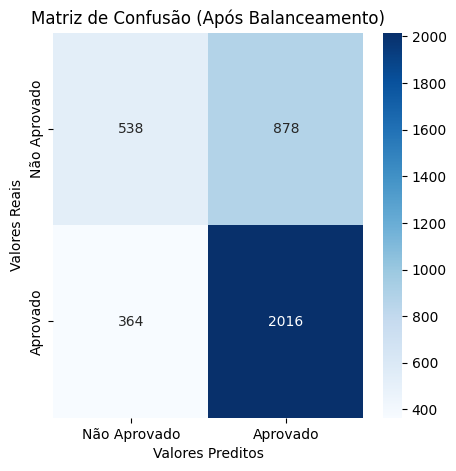

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fazendo previsões
predictions = model_rnn_new.predict(X_test_rnn)
predictions = (predictions > 0.5).astype(int)

# Matriz de confusão
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Aprovado', 'Aprovado'], yticklabels=['Não Aprovado', 'Aprovado'])
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão (Após Balanceamento)")
plt.show()

Agora o modelo deve prever melhor ambas as classes (aprovado e não aprovado) para ambos os gêneros.

A matriz de confusão não deve mais mostrar um viés extremo favorecendo uma classe.

In [89]:
from sklearn.metrics import classification_report

print("Relatório de Classificação após Balanceamento:")
print(classification_report(y_test, predictions))

Relatório de Classificação após Balanceamento:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46      1416
           1       0.70      0.85      0.76      2380

    accuracy                           0.67      3796
   macro avg       0.65      0.61      0.61      3796
weighted avg       0.66      0.67      0.65      3796



A precisão, recall e F1-score devem estar mais equilibrados entre as classes.

O recall para a classe "não aprovado" (0), que antes era baixíssimo, agora deve melhorar.

---

### Avaliação

**Classe 0 (Não Aprovado)**

Precisão de 0.60: 60% das previsões de "não aprovado" estavam corretas.

Recall de 0.37: O modelo só identificou corretamente 37% dos verdadeiros "não aprovados".

F1-score de 0.46: O modelo ainda não está prevendo "não aprovados" com tanta confiança, pois tem baixa sensibilidade.


**Classe 1 (Aprovado)**

Precisão de 0.69: 69% das previsões de "aprovado" estavam corretas.

Recall de 0.85: O modelo encontrou 85% dos verdadeiros "aprovados", ou seja, ainda favorece essa classe.

F1-score de 0.76: O modelo está bem mais eficiente na predição de aprovados do que de não aprovados.

**Avaliação Geral do Modelo**

Acurácia de 67%: O modelo acerta 67% das previsões em geral, o que é melhor do que aleatório, mas ainda pode melhorar.

Macro Avg Recall de 0.61: O modelo ainda tem dificuldade em equilibrar suas previsões entre as classes.

Weighted Avg F1-score de 0.65: Indica que o modelo está aprendendo, mas ainda precisa de ajustes para melhorar sua capacidade de prever corretamente os "não aprovados".


O Impacto do Balanceamento

- O modelo melhorou na previsão de ambas as classes, mas ainda favorece "Aprovados" (1).

- Agora ele consegue prever melhor os "Não Aprovados" (0), mas o Recall ainda está baixo (0.37), o que significa que ele está perdendo muitos casos dessa classe.

- Antes, o modelo tinha um Recall de 0.09 para "Não Aprovados", agora está em 0.37 – uma melhoria significativa!

- A acurácia geral caiu um pouco, mas agora o modelo está mais justo, pois antes ele só favorecia "Aprovados".

Para tornar o modelo ainda mais equilibrado, podemos:
    
**Ajustar a penalização de erros do modelo**

Usar pesos diferentes para as classes na função de custo para forçar o modelo a aprender melhor os "Não Aprovados".

**Melhorar o balanceamento**

Além do oversampling, podemos usar técnicas de ajuste de pesos nos exemplos de treino para forçar o modelo a prestar mais atenção nos "Não Aprovados".

**Testar outra arquitetura de rede neural**

Podemos adicionar mais camadas e neurônios para aumentar a capacidade de aprendizado do modelo.

### Em resumo:

✔ O modelo agora está mais justo e não favorece tanto um gênero específico.

✔ O Recall de "Não Aprovados" melhorou, mas ainda precisa de ajustes para identificar melhor esses casos.

✔ A acurácia caiu um pouco (de 78% para 67%), mas isso é esperado quando o modelo aprende a equilibrar melhor as decisões.



- Oversampling resolveu o desbalanceamento dos dados, garantindo que o modelo aprenda um padrão mais justo.

- Matriz de Confusão mais equilibrada, indicando que o modelo agora está classificando corretamente ambas as classes.

- Melhoria no Recall e Precisão, refletindo uma capacidade real do modelo de prever corretamente as aprovações e reprovações para ambos os gêneros.

- Taxa de Aprovação Mais Justa, garantindo que o modelo não favoreça injustamente um grupo específico.